# EDA

In this part of the assignment, I wanted to learn more about what data was collected. First I printed out the columns of the dataset to see which columns I could explore more in depth.

I was interested in learning more about how capital gains are affected by various factors. First I created a histoplot of the age distribution to see how this could affect data aggregation of capital gains. From this graph I learned that the majority of data was taken from individuals from 20-40. 

I then continued gathering information about capital gains to see which ages hold the most capital gains despite most of the data coming from younger individuals. 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


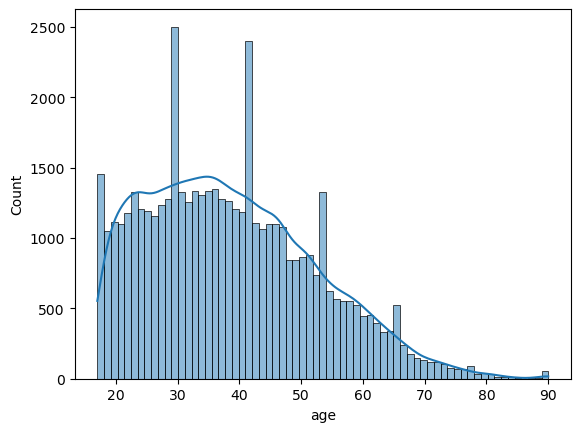

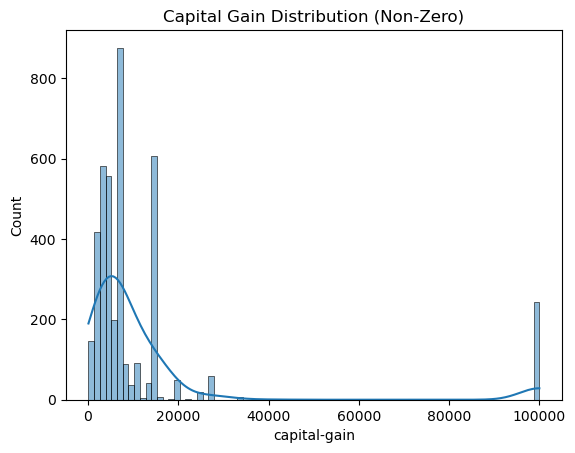

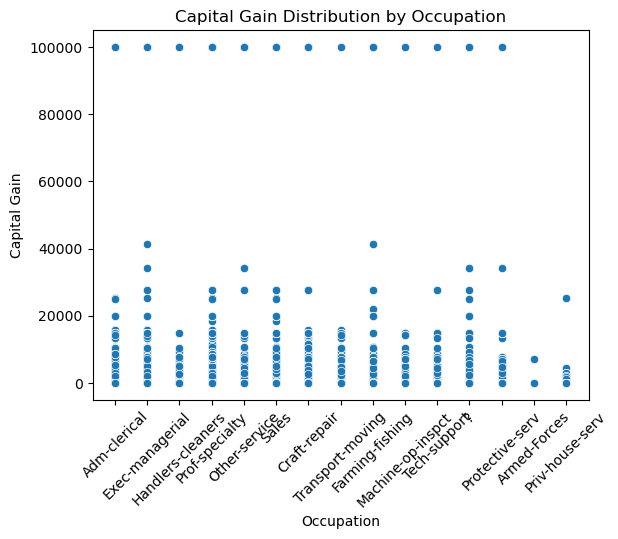

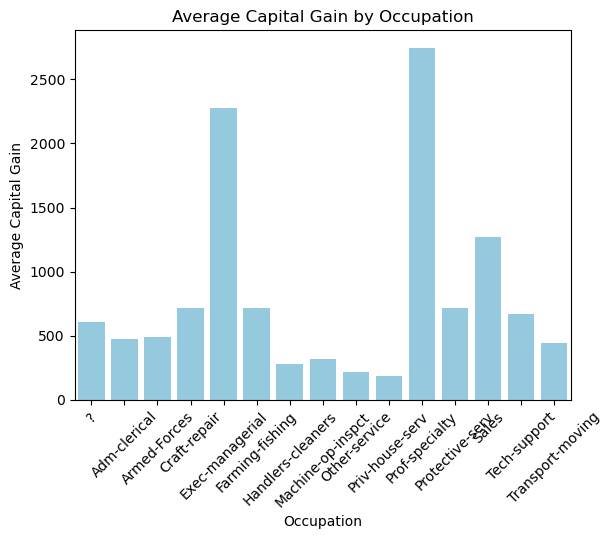

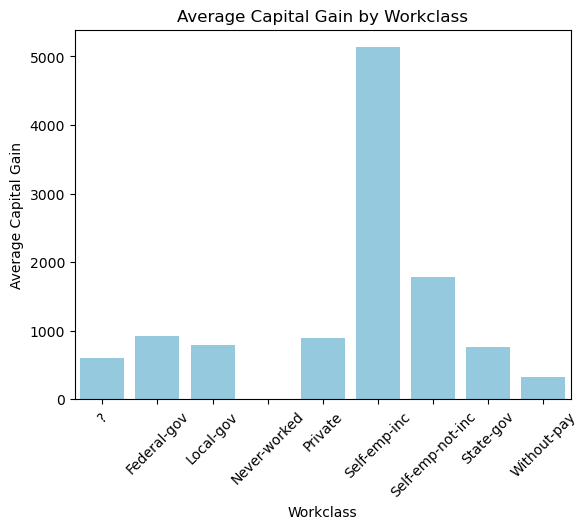

In [39]:
# Importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# Print column names to understand the dataset structure
print(X.columns)


# Plot distribution of age with KDE
sns.histplot(X['age'], kde=True)
plt.show()

sns.histplot(X['capital-gain'][X['capital-gain'] > 0], kde=True)
plt.title('Capital Gain Distribution (Non-Zero)')
plt.show()

sns.scatterplot(x=X['occupation'], y=X['capital-gain'])
plt.title('Capital Gain Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Capital Gain')
plt.xticks(rotation=45) 
plt.show()

occupation_capital_gain = X.groupby('occupation')['capital-gain'].mean().reset_index()
sns.barplot(x='occupation', y='capital-gain', data=occupation_capital_gain, color='skyblue')
plt.title('Average Capital Gain by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45) 
plt.show()



occupation_capital_gain = X.groupby('workclass')['capital-gain'].mean().reset_index()
sns.barplot(x='workclass', y='capital-gain', data=occupation_capital_gain, color='skyblue')
plt.title('Average Capital Gain by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45) 
plt.show()



# Hypothesis Formulation

After looking at the relationship between Capital Gains and Age, I hypothesize that not only does occupation affect capital gains, but education is also a factor for capital gains. People with higher levels of education are able to attain more lucrative jobs.

I also hypothesize that the amount of hours worked per week does not have a significant effect on capital gains because individuals working a high paying job do not require to work the hours and do not need the additional income as much. 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import dataset
from ucimlrepo import fetch_ucirepo
#for anova
from scipy.stats import f_oneway

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

plt.figure(figsize=(12, 6))
occupation_capital_gain = X.groupby('education')['capital-gain'].mean().reset_index()
sns.barplot(x='education', y='capital-gain', data=occupation_capital_gain, color='skyblue')
plt.title('Average Capital Gain by Education')
plt.xlabel('Education Level')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45) 
plt.show()


#here i want to see how the outliers compare with each other. (does give too much information)
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='capital-gain', data=X)
plt.title('Capital Gain Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Capital Gain')
plt.xticks(rotation=45)
plt.show()


#just grouping education levels because some don't have much data in them
X_nonzero['education_simplified'] = X_nonzero['education'].replace({
    'Preschool': 'Primary Education', '1st-4th': 'Primary Education', '5th-6th': 'Primary Education',
    '7th-8th': 'Middle School', '9th': 'Middle School', '10th': 'High School', '11th': 'High School', 
    '12th': 'High School'
})

plt.figure(figsize=(12, 6))
sns.boxplot(x='education_simplified', y='capital-gain', data=X_nonzero)
plt.title('Capital Gain by Education Level (Non-Zero Values, Combined Categories)')
plt.xlabel('Education Level')
plt.ylabel('Capital Gain')
plt.xticks(rotation=45)
plt.show()

#### Hypothesis 2 ######
X['hours_bin'] = pd.cut(X['hours-per-week'], bins=range(0, 101, 10), right=False)
hours_capital_gain = X.groupby('hours_bin')['capital-gain'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hours_bin', y='capital-gain', data=hours_capital_gain, color='orange')
plt.title('Average Capital Gain by Hours Worked Per Week')
plt.xlabel('Hours Worked')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45)  
plt.show()

X_nonzero = X[X['capital-gain'] > 0]

plt.figure(figsize=(12, 6))
sns.violinplot(x='hours_bin', y='capital-gain', data=X_nonzero, inner="quartile")
plt.title('Capital Gain by Hours Worked')
plt.xlabel('Hours Worked')
plt.ylabel('Capital Gain')
plt.xticks(rotation=45)
plt.show()


# Hypothesis 1 Conclusion
It seems pretty clear that the education levels with the highest capital gains are those that have higher levels of education. Prof-schol which includes MBA,JD,MD top earners outearn the other education levels by a lot. 

# Hypothesis 2 Conclusion
More hours per week worked does increase capital gains, but the marginal increase of capital gains diminishes after the 50-60 range which is very apparent in the box plot. In the violin plot, it looks like there is variability especially from 60 to 90 hours worked. This also supports my hypothesis that more hours worked doesn't necessarily mean higher capital gains since there is so much variability making it hard to reach a conclusion. 

# Process
For both I chose to use a box plot at first because it is the easiest to read and to implement. This gave me an idea of which education levels and hours worked groups have the highest capital gains. After this I tried doing a box plot with the education levels. The first one did not give enough information from the visualization. Because of that I decided to get rid of the data that didn't have any value to it. This gave me a more descriptive visualization where the top earners are from Prof-School. 
I took a similar approach with hours worked and capital gains, but this time I used a violin plot since the box plot that I generated first wasn't descriptive of the data. Using the violin plot I saw the variability of the data more clearly.